# MuMoT Demonstration Notebook: Michaelis Menten <a class="tocSkip">
    
*Aldo Estefano Encarnacion Segura, Department of Computer Science, University of Sheffield*


This is a demo for [MuMoT](https://github.com/DiODeProject/MuMoT), a software tool developed at the University of Sheffield as part of the [DiODe](http://diode.group.shef.ac.uk) project

In [1]:
import mumot

mumot.setVerboseExceptions()

Created `%%model` as an alias for `%%latex`.


### Introduction to the Michaelis-Menten model

In this short demo we will analyse one of the simplest models of enzyme kinetics: The Michaelis-Menten model. We will explore the four-dimensional original model, and then we will focus on two modified equations from the model after reducing the dynamic description of the model.

The original paper published in German under the name Die Kinetik der Invertinwirkung by L. Michaelis and Miss Maud L. Menten. An english translation of the original article as well as a historical context and summary was published by Johnson & Goody ([2011](#references)). For a general overview of the model see Murray ([2002](#references), p.175).

The Michaelis-Menten dynamics describe product formation as a result of an enzymatic reaction. Substrate $S$ binds irreversibly with enzyme $E$ to form a complex $C$, which in turn delivers the product $P$ and the enzyme.


#### Michaelis-Menten original model

In [2]:
model = mumot.parseModel(r"""
E + S -> C + \emptyset : k_f
C + \emptyset -> E + S : k_r
C + \emptyset -> E + P : k_c
""")

In [3]:
model.showReactants()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
model.showRates()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
model.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
model.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We have declared the reactions of the model and MuMoT has derived the ordinary differential equations that correspond to the four components of our system. Each term is a different reaction that either increases or decreases a variable's concentration. 

Unfortunately, the visualisation rendered by MuMoT does not reflect the dynamics of the system. The reaction scheme is usually portrayed as:  $S + E ⟷ C \rightarrow P + E$  

In [ ]:
model.visualise()

We can integrate our model to track how the concentration of each of our components change over time. The parameters used are arbitrarily chosen for demonstration purposes. We start with substrate $S$ and $E$ present and no $P$ nor the intermediary complex $C$, which are yet to be formed.

The integration shows that both the enzyme and the complex go through a transient phase in which their concentration dips or rises before returning to its initial state. On the other hand, the substrate has being irreversibly transformed into the product. 

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=1.0, continuous_update=False, description='\\(k_{f}\\)', max=10.0, readout_format='.1f', sty…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=0.1, step=0.01, style=SliderSt…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{C}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


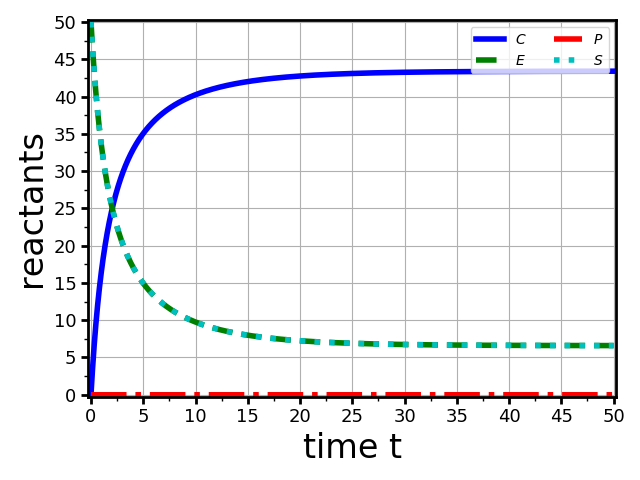

In [4]:
int0 = model.integrate(initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 0.1, 0.01],
                                       'initialState':{'S': [0.5,0,1,0.1],'E': [0.5,0,1,0.1],'P': [0,0,1,0.1],'C': [0,0,1,0.1]}}, 
                        maxTime = 50)


In [29]:
int0.showLogs(tail = True)

Showing last 3 of 3 log entries:
Starting numerical integration of ODE system with parameters (k_{c}=0.1), (k_{f}=1.0), (k_{r}=0.0001), (initC=0.0), (initE=0.5), (initP=0.0), (initS=0.5), (substitutedReactant=None), (maxTime=50), (conserved=False), at 2020-03-13 23:45:30.579817
Last point on curve:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

By selecting just the state variables that we are interested in, we can observe with more clarity the evolution over time of the substrate and the product. 

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=1.0, continuous_update=False, description='\\(k_{f}\\)', max=10.0, readout_format='.1f', sty…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=0.1, step=0.01, style=SliderSt…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{C}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


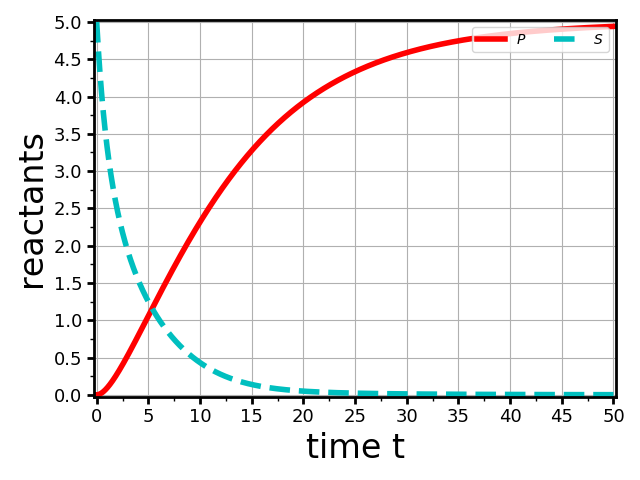

In [74]:
int1 = model.integrate(showStateVars=['S','P'],initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 0.1, 0.01],
                                       'initialState':{'S': [0.5,0,1,0.1],'E': [0.5,0,1,0.1],'P': [0,0,1,0.1],'C': [0,0,1,0.1]}}, 
                        maxTime = 50)


We can also analyse our MuMoT offers bifurcation analysis as well as looking at the vector field of the system, which allows us to see how all solutions develop over time. However, our model is a four-dimensional system, which unfortunately, prevents us from performing bifurcation analysis and vector analysis, since these are features supported on lower-dimensional systems.

In [48]:
bifurcation1 = model.bifurcation('k_f','P-S')

Sorry, bifurcation diagrams are currently only supported for 1D and 2D systems (1 or 2 time-dependent variables in the ODE system)!


##### The effects of noise

We can however analyse the effects of noise in our model by making use of the Stochastic Simulation Algorithm (SSA).

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=1.0, continuous_update=False, description='\\(k_{f}\\)', max=10.0, readout_format='.1f', sty…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=0.1, step=0.01, style=SliderSt…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=1.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{C}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description…

<IPython.core.display.Javascript object>


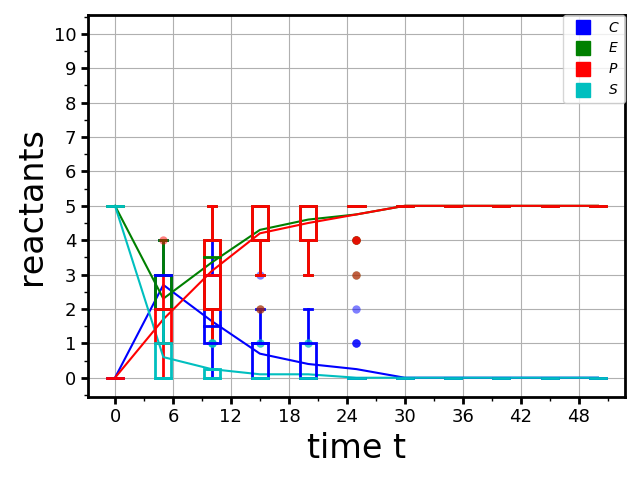

In [75]:
mssa=model.SSA(initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 0.1, 0.01],
                                       'systemSize':[10,1,100,1],
                                       'initialState':{'S': [0.5,0,1,0.1],'E': [0.5,0,1,0.1],'P': [0,0,1,0.1],'C': [0,0,1,0.1]}}, 
                                       maxTime = 50, runs = 20,
                                       choose_yrange=[0,5.5])

#### Michaelis-Menten reduced dynamics 

In order to make use of some of MuMoT's feature we require a model with lower dimensions. Palsson ([2011](#references), p.81) shows how the original model can be analysed in terms of just $S$ and $C$ by using the relationship for the total amount of enzyme:

 $E_{o} = E + C$
 
By replacing $C$ in the equations of $S$ and $X$ we can obtain a two dimensional model that follows the dynamics of these two components in the same way our four-dimensional model did.

In [100]:
model_reduced = mumot.parseModel(r"""
C + S -> S + S: k_f
C -> S: k_r
C -> \emptyset: k_c
S -> C: k_f*e_o
""")

In [101]:
model_reduced.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/aldo/mumot-env/lib/python3.6/site-packages/mumot/utils.py:197: MuMoTWarning: WARNING! the initial value of reactant C has been changed to 0.5

  warn(wrn_msg, exceptions.MuMoTWarning)


FloatSlider(value=0.5, continuous_update=False, description='\\(e_{o}\\)', max=1.0, readout_format='.1f', styl…

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=1.0, continuous_update=False, description='\\(k_{f}\\)', max=10.0, readout_format='.1f', sty…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=0.1, step=0.01, style=SliderSt…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=0.5, continuous_update=False, description='$\\Phi_{C}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


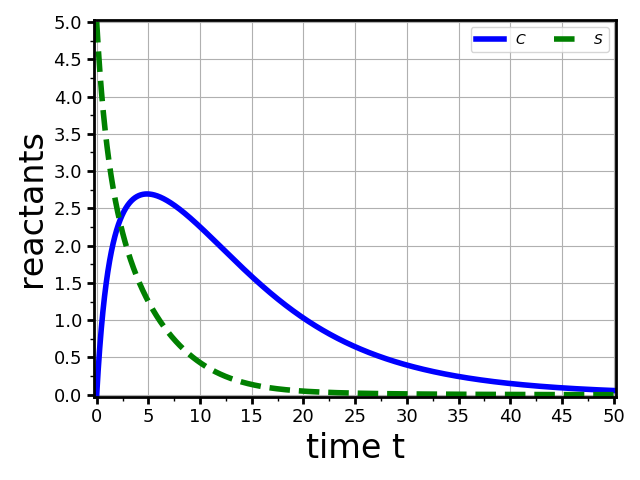

In [98]:
int1 = model_reduced.integrate(initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 0.1, 0.01],
                                       '\e_o':[0.5, 0, 1, 0.1],
                                       'initialState':{'S': [0.5,0,1,0.1],'C': [0,0,1,0.1]}}, 
                        maxTime = 50)


In [113]:
int1.showLogs(tail = True)

Showing last 5 of 5 log entries:
Starting numerical integration of ODE system with parameters (e_{o}=0.5), (k_{c}=0.1), (k_{f}=1.0), (k_{r}=0.01), (initC=0.5), (initS=0.5), (substitutedReactant=None), (maxTime=50), (conserved=False), at 2020-03-14 04:17:42.279778
Last point on curve:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Starting numerical integration of ODE system with parameters (e_{o}=0.5), (k_{c}=0.1), (k_{f}=1.0), (k_{r}=0.01), (initC=0.0), (initS=0.5), (substitutedReactant=None), (maxTime=50), (conserved=False), at 2020-03-14 04:17:47.407262
Last point on curve:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

With this model we can use the bifurcation analysis capbilities of MuMoT, although, in this case, the results are not as informative.

FloatSlider(value=0.5, continuous_update=False, description='\\(e_{o}\\)', max=1.0, readout_format='.1f', styl…

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=0.1, step=0.01, style=SliderSt…

Accordion(children=(Box(children=(FloatSlider(value=2.0, continuous_update=False, description='Initial \\(k_f\…

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


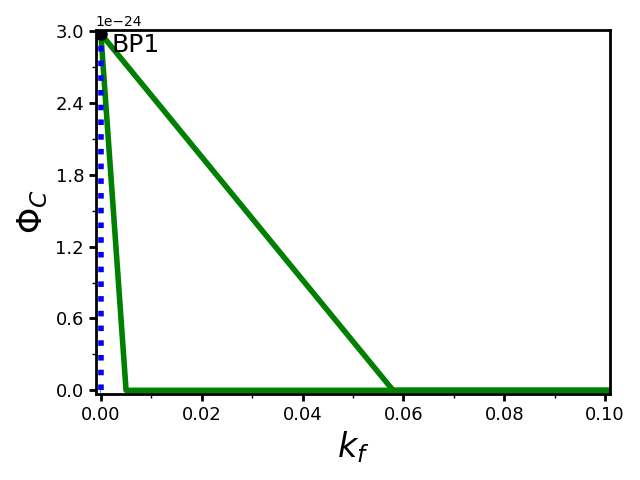

In [104]:
bifurcation1 = model_reduced.bifurcation('k_f','C', initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 0.1, 0.01],
                                       '\e_o':[0.5, 0, 1, 0.1],
                                       'initialState':{'S': [0.5,0,1,0.1],'C': [0,0,1,0.1]}},
                                        choose_xrange=[0, 0.1])

Both the `vector` and the `stream` functions show similar outputs. They display how, for our model, only a single solution exists at the origin, since both the substrate $S$ and the complex $C$ are depleted by the reaction.   

FloatSlider(value=0.5, continuous_update=False, description='\\(e_{o}\\)', max=1.0, readout_format='.1f', styl…

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=1.0, continuous_update=False, description='\\(k_{f}\\)', max=10.0, readout_format='.1f', sty…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=0.1, step=0.01, style=SliderSt…

FloatSlider(value=1.0, continuous_update=False, description='Plot limits', max=5.0, min=0.1, readout_format='.…

Accordion(children=(Box(children=(IntSlider(value=20, continuous_update=False, description='Number of runs:', …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


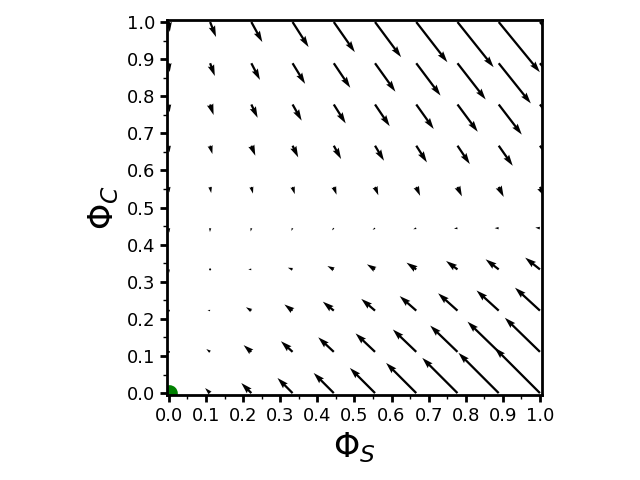

In [107]:
vector1 = model_reduced.vector('S', 'C', showFixedPoints = True, initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 0.1, 0.01],
                                       '\e_o':[0.5, 0, 1, 0.1],
                                       'initialState':{'S': [0.5,0,1,0.1],'C': [0,0,1,0.1]}})

FloatSlider(value=0.5, continuous_update=False, description='\\(e_{o}\\)', max=1.0, readout_format='.1f', styl…

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=1.0, continuous_update=False, description='\\(k_{f}\\)', max=10.0, readout_format='.1f', sty…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=10.0, step=0.01, style=SliderS…

FloatSlider(value=1.0, continuous_update=False, description='Plot limits', max=5.0, min=0.1, readout_format='.…

Accordion(children=(Box(children=(IntSlider(value=20, continuous_update=False, description='Number of runs:', …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


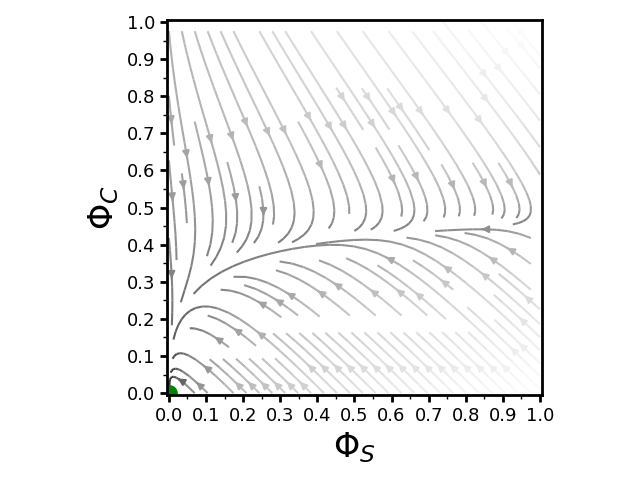

In [110]:
vector1 = model_reduced.stream('S', 'C', showFixedPoints = True, initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 10, 0.01],
                                       '\e_o':[0.5, 0, 1, 0.1],
                                       'initialState':{'S': [0.5,0,1,0.1],'C': [0,0,1,0.1]}})

##### The effects of noise

Likewise, we can analyse the effects of noise in our system.

/home/aldo/mumot-env/lib/python3.6/site-packages/mumot/utils.py:197: MuMoTWarning: WARNING! the initial value of reactant C has been changed to 1

  warn(wrn_msg, exceptions.MuMoTWarning)


FloatSlider(value=0.5, continuous_update=False, description='\\(e_{o}\\)', max=1.0, readout_format='.1f', styl…

FloatSlider(value=0.1, continuous_update=False, description='\\(k_{c}\\)', max=0.5, readout_format='.1f', styl…

FloatSlider(value=1.0, continuous_update=False, description='\\(k_{f}\\)', max=10.0, readout_format='.1f', sty…

FloatSlider(value=0.01, continuous_update=False, description='\\(k_{r}\\)', max=0.1, step=0.01, style=SliderSt…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='$\\Phi_{C}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description…

<IPython.core.display.Javascript object>


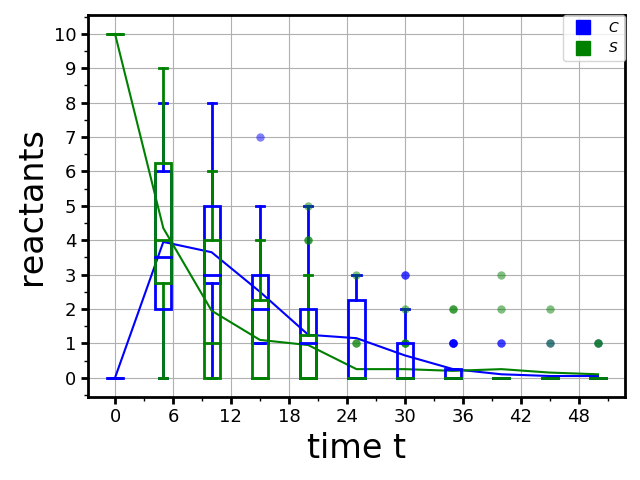

In [114]:
mssa_red=model_reduced.SSA(initWidgets = {'\k_c':[0.1, 0, 0.5, 0.1],
                                       '\k_f':[1, 0, 10, 0.1],
                                       '\k_r':[0.01, 0, 0.1, 0.01],
                                       '\e_o':[0.5, 0, 1, 0.1],
                                       'initialState':{'C': [0,0,1,0.1]},'S': [1,0,1,0.1]}, 
                        maxTime = 50, runs=20)

### References
<a id='references'></a>

* Michaelis L, Menten ML. 1913 Die kinetik derinvertinwirkung.Biochem.  Z **49**, 352.
* Murray, J. D. (2002). Mathematical biology : An introduction. Retrieved from https://ebookcentral.proquest.com
* Michaelis, L., Menten, M. L., Johnson, K. A., & Goody, R. S. (2011). The original Michaelis constant: translation of the 1913 Michaelis-Menten paper. Biochemistry, **50**(39), 8264–8269. https://doi.org/10.1021/bi201284u
* Palsson, B. (2011). Enzyme kinetics. In Systems Biology: Simulation of Dynamic Network States (pp. 80-81). Cambridge: Cambridge University Press. doi:10.1017/CBO9780511736179.007